In [351]:
import pandas as pd
import re
import numpy as np
from scipy import stats

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from dateutil import parser
from datetime import datetime

from math import floor

# Purpose

This notebook is meant to practice analyzing one VA station at a time.

 

# The Data

In [352]:
master = pd.read_csv("Data/Master/Master.csv")
df = master
df.head()

,Appts_Pending_1412,%_Appts_Over_30_Pending_1412,PC_Wait_Pending_1412,SC_Wait_Pending_1412,MH_Wait_Pending_1412,for_dups,ORGANIZATION,MAY-FY11,MAY-FY12,MAY-FY13,...,MH_Wait_Complete_Increase_%,Staff_To_Appts_Pending_14,Staff_To_Appts_Pending_16,Staff_To_Appts_Complete_14,Staff_To_Appts_Complete_16,Percentage_Point_Wait_Over_30_Increase_Pending,Percentage_Point_Wait_Over_30_Increase_Complete,State,Name,qualitative_size
0,42899,2.70,2.51,4.07,2.77,402,(V01) (402) HCS TOGUS ME,1293.0,1272.0,1248.0,...,30.769231,33.436477,30.158368,19.063133,19.836100,1.48,-0.33,ME,"TOGUS, ME",average
1,23709,2.16,3.92,3.95,0.79,405,(V01) (405) MROC WHT RIVER JCT VT,852.0,853.0,881.0,...,57.142857,25.742671,17.919286,20.881650,18.335599,1.67,0.19,VT,"WHITE RIVER JUNCTION, VT",average
2,8105,5.17,1.12,10.53,4.41,518,(V01) (518) MC BEDFORD MA,1313.0,1265.0,1245.0,...,-79.291553,6.478817,10.692308,9.573141,9.741124,2.37,-0.44,MA,"BEDFORD, MA",average
3,85625,1.71,1.66,3.53,3.92,523,(V01) (523) HCS BOSTON MA,4022.0,4011.0,4041.0,...,-17.490494,21.236359,19.607948,11.326637,10.761329,2.72,1.66,MA,"VA BOSTON HCS, MA",large
4,19511,2.64,2.66,4.21,5.13,608,(V01) (608) MC MANCHESTER NH,663.0,683.0,691.0,...,-2.325581,28.441691,31.661270,25.679300,23.473225,1.45,-0.03,NH,"MANCHESTER, NH",small


# Functions

In [353]:
# Marks where in a histogram the station is located. 
# Code belongs to Tony Babarino from stackoverflow.com.
# http://stackoverflow.com/questions/35890738/change-the-colour-of-a-matplotlib-histogram-bin-bar-given-a-value

def marked_hist(column,new_ax):
    p = df[column].plot(kind="hist", color='teal',bins=30, ax=new_ax)
    bar_value_to_label = float(Station[column].to_string(index=False))
    min_distance = float("inf")
    index_of_bar_to_label = 0
    for i, rectangle in enumerate(p.patches):  # iterate over every bar
        tmp = abs(  # tmp = distance from middle of the bar to bar_value_to_label
            (rectangle.get_x() +
                (rectangle.get_width() * (1 / 2))) - bar_value_to_label)
        if tmp < min_distance:  # we are searching for the bar with x cordinate
                                # closest to bar_value_to_label
            min_distance = tmp
            index_of_bar_to_label = i
            
    x = Station[column].to_string(index=False)
    if x != 'NaN':
        p.patches[index_of_bar_to_label].set_color('red')

# The Station



In [354]:
#Station = df[df["Station"] == "573"]#Gainesville
#Station = df[df["Station"] == "358"]
#Station = df[df["Station"] == "504"]
#Station = df[df["Station"] == "664"]# San Diego
#Station = df[df["Station"] == "663"]# Seattle, WA
#Station = df[df["Station"] == "668"]# Spokane, WA
#Station = df[df["Station"] == "687"]# Walla Walla, WA



#station_number = Station["Station"].to_string(index=False)
#Station[["Appts_Pending_1412","Appts_Pending_1610"]]
#print Station["Location"]

### Marking the station

In [355]:
mark = []
for index, row in df.iterrows():
    if row["Station"] == Station["Station"].to_string(index=False):
        mark.append("mark")
    else:
        mark.append("no")
df["Mark"] = mark
    

### Metric

In [356]:
def std_distance(factor):
    std = df[factor].std()
    mean = df[factor].mean()
    return "{}: {}".format(factor,str((Station[factor].item()-mean)/std))
def std_distance_raw(factor):
    std = df[factor].std()
    mean = df[factor].mean()
    return (mean - Station[factor].item())/std

In [357]:
factors = ["PC_Wait_Pending_Increase_%","PC_Wait_Complete_Increase_%","SC_Wait_Pending_Increase_%","SC_Wait_Complete_Increase_%",
           "MH_Wait_Pending_Increase_%","MH_Wait_Pending_Increase_%","Pending_Increase_%","Complete_Increase_%",
          "Choice_Increase_%","Physician_Turnover_FY11","Physician_Turnover_FY12","Physician_Turnover_FY13",
          "Physician_Turnover_FY14","Physician_Turnover_FY15",'Staff_11_To_12_Increase_%','Staff_12_To_13_Increase_%',
          'Staff_13_To_14_Increase_%','Staff_14_To_15_Increase_%','Staff_15_To_16_Increase_%',"Complete_Pending_Gap_Increase_%",
          'Staff_To_Appts_Complete_14','Staff_To_Appts_Complete_16']






def interest_metric(station):
    interest = {}
    for factor in factors:
        std = df[factor].std()
        mean = df[factor].mean()
        distance = (station[factor].item() - mean)/std
        interest[factor] = distance
    return interest

interest_metric(Station)

{'Choice_Increase_%': -0.41334492383511345,
 'Complete_Increase_%': 1.9058237992470011,
 'Complete_Pending_Gap_Increase_%': 0.31567822820575325,
 'MH_Wait_Pending_Increase_%': 0.82611564018655537,
 'PC_Wait_Complete_Increase_%': 1.7262620950012022,
 'PC_Wait_Pending_Increase_%': 0.19207576123492764,
 'Pending_Increase_%': 2.1981959813840626,
 'Physician_Turnover_FY11': -2.3953306115424531,
 'Physician_Turnover_FY12': -2.091816371669784,
 'Physician_Turnover_FY13': -2.0371163992506514,
 'Physician_Turnover_FY14': -1.3286108544380493,
 'Physician_Turnover_FY15': -2.223152745737579,
 'SC_Wait_Complete_Increase_%': -0.094994256563098275,
 'SC_Wait_Pending_Increase_%': -0.0045922120873707322,
 'Staff_11_To_12_Increase_%': 1.6250995570544788,
 'Staff_12_To_13_Increase_%': 1.6033475516333064,
 'Staff_13_To_14_Increase_%': 1.2661046174568977,
 'Staff_14_To_15_Increase_%': 1.2642480744600606,
 'Staff_15_To_16_Increase_%': 3.9805077084643146,
 'Staff_To_Appts_Complete_14': 0.11568924445942366,
 

count    21.000000
mean      0.309603
std       1.668486
min      -2.395331
25%      -0.413345
50%       0.192076
75%       1.603348
max       3.980508
Name: Station, dtype: float64

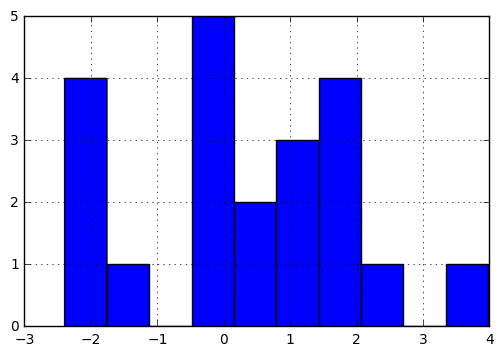

In [358]:
x = interest_metric(Station)
pd.DataFrame(x,index=["Station"]).transpose()["Station"].hist()
pd.DataFrame(x,index=["Station"]).transpose()["Station"].describe()


### Pending percent increase

In [359]:

print "================\nWait Times\n"
print std_distance('PC_Wait_Pending_Increase_%')
print std_distance('PC_Wait_Complete_Increase_%')
print std_distance('SC_Wait_Pending_Increase_%')
print std_distance('SC_Wait_Complete_Increase_%')
print std_distance('MH_Wait_Pending_Increase_%')
print std_distance('MH_Wait_Complete_Increase_%')
print "================\nAppointments\n"
print std_distance("Pending_Increase_%")
print std_distance("Complete_Increase_%")
print "================\nChoice Hires\n"
print std_distance("Choice_Increase_%")
print "================\nPhysician Turnover\n"
print std_distance("Physician_Turnover_FY11")
print std_distance("Physician_Turnover_FY12")
print std_distance("Physician_Turnover_FY13")
print std_distance("Physician_Turnover_FY14")
print std_distance("Physician_Turnover_FY15")
print "================\nStaff Increase\n"
print std_distance('Staff_11_To_12_Increase_%')
print std_distance('Staff_12_To_13_Increase_%')
print std_distance('Staff_13_To_14_Increase_%')
print std_distance('Staff_14_To_15_Increase_%')
print std_distance('Staff_15_To_16_Increase_%')

Wait Times

PC_Wait_Pending_Increase_%: 0.192075761235
PC_Wait_Complete_Increase_%: 1.726262095
SC_Wait_Pending_Increase_%: -0.00459221208737
SC_Wait_Complete_Increase_%: -0.0949942565631
MH_Wait_Pending_Increase_%: 0.826115640187
MH_Wait_Complete_Increase_%: 0.964028015327
Appointments

Pending_Increase_%: 2.19819598138
Complete_Increase_%: 1.90582379925
Choice Hires

Choice_Increase_%: -0.413344923835
Physician Turnover

Physician_Turnover_FY11: -2.39533061154
Physician_Turnover_FY12: -2.09181637167
Physician_Turnover_FY13: -2.03711639925
Physician_Turnover_FY14: -1.32861085444
Physician_Turnover_FY15: -2.22315274574
Staff Increase

Staff_11_To_12_Increase_%: 1.62509955705
Staff_12_To_13_Increase_%: 1.60334755163
Staff_13_To_14_Increase_%: 1.26610461746
Staff_14_To_15_Increase_%: 1.26424807446
Staff_15_To_16_Increase_%: 3.98050770846


In [360]:
factors = ["PC_Wait_Pending_Increase_%","PC_Wait_Complete_Increase_%","SC_Wait_Pending_Increase_%","SC_Wait_Complete_Increase_%",
           "MH_Wait_Pending_Increase_%","MH_Wait_Pending_Increase_%","Pending_Increase_%","Complete_Increase_%",
          "Choice_Increase_%","Physician_Turnover_FY14",
           "Physician_Turnover_FY15",'Staff_14_To_15_Increase_%','Staff_15_To_16_Increase_%']





def interest_metric(station):
    interest = {}
    for factor in factors:
        std = df[factor].std()
        mean = df[factor].mean()
        distance = (Station[factor].item() - mean)/std
        interest[factor] = distance
    return interest

interest_metric(Station)

{'Choice_Increase_%': -0.41334492383511345,
 'Complete_Increase_%': 1.9058237992470011,
 'MH_Wait_Pending_Increase_%': 0.82611564018655537,
 'PC_Wait_Complete_Increase_%': 1.7262620950012022,
 'PC_Wait_Pending_Increase_%': 0.19207576123492764,
 'Pending_Increase_%': 2.1981959813840626,
 'Physician_Turnover_FY14': -1.3286108544380493,
 'Physician_Turnover_FY15': -2.223152745737579,
 'SC_Wait_Complete_Increase_%': -0.094994256563098275,
 'SC_Wait_Pending_Increase_%': -0.0045922120873707322,
 'Staff_14_To_15_Increase_%': 1.2642480744600606,
 'Staff_15_To_16_Increase_%': 3.9805077084643146}

In [361]:
interest = interest_metric(Station)
angle = 0
for factor in interest:
    if abs(interest[factor]) >= 1:
        angle += 1
        print "{}: {}".format(factor,interest[factor])
        
angle

Staff_15_To_16_Increase_%: 3.98050770846
PC_Wait_Complete_Increase_%: 1.726262095
Physician_Turnover_FY14: -1.32861085444
Physician_Turnover_FY15: -2.22315274574
Staff_14_To_15_Increase_%: 1.26424807446
Pending_Increase_%: 2.19819598138
Complete_Increase_%: 1.90582379925


7

# Looking at the Angles

In [362]:
factors = ["PC_Wait_Pending_Increase_%","PC_Wait_Complete_Increase_%","SC_Wait_Pending_Increase_%","SC_Wait_Complete_Increase_%",
           "MH_Wait_Pending_Increase_%","MH_Wait_Pending_Increase_%","Pending_Increase_%","Complete_Increase_%",
          "Choice_Increase_%","Physician_Turnover_FY14",
           "Physician_Turnover_FY15",'Staff_14_To_15_Increase_%','Staff_15_To_16_Increase_%',"Complete_Pending_Gap_Increase_%",
          "PC_Wait_Complete_1409","PC_Wait_Complete_1608","PC_Wait_Pending_1412","PC_Wait_Pending_1610"]

In [363]:
def interest_metric(x):
    interest = {}
    for factor in factors:
        std = df[factor].std()
        mean = df[factor].mean()
        distance = (x[factor] - mean)/std
        interest[factor] = distance
    return interest



angles = []
for index, row in df.iterrows():
    interest_dict = interest_metric(row)
    angle = 0
    for factor in interest:
        #print interest_dict[factor]
        if abs(interest_dict[factor]) >= 1:
            angle += 1
    angles.append(angle)
df["angles"] = angles
df["angles"].value_counts()

1    37
0    37
2    25
3    20
4     9
5     8
7     2
8     1
6     1
Name: angles, dtype: int64

In [364]:
strongest_angles = []
for index, row in df.iterrows():
    interest_dict = interest_metric(row)
    angle = 0
    for factor in interest:
        if abs(interest_dict[factor]) > angle:
            angle = floor(abs(interest_dict[factor]))
    strongest_angles.append(angle)
df["strongest_angles"] = strongest_angles
df["strongest_angles"].value_counts()

1.0     65
0.0     37
2.0     19
3.0      6
4.0      5
5.0      3
8.0      2
6.0      2
11.0     1
Name: strongest_angles, dtype: int64

In [365]:
strong_angles = []
for index, row in df.iterrows():
    interest_dict = interest_metric(row)
    angle = 0
    for factor in interest:
        if abs(interest_dict[factor]) >= 2:
            angle += 1
    strong_angles.append(angle)
df["strong_angles"] = strong_angles
df["strong_angles"].value_counts()

0    102
1     21
2     12
3      3
5      1
4      1
Name: strong_angles, dtype: int64

In [366]:
for factor in factors:
    print factor

PC_Wait_Pending_Increase_%
PC_Wait_Complete_Increase_%
SC_Wait_Pending_Increase_%
SC_Wait_Complete_Increase_%
MH_Wait_Pending_Increase_%
MH_Wait_Pending_Increase_%
Pending_Increase_%
Complete_Increase_%
Choice_Increase_%
Physician_Turnover_FY14
Physician_Turnover_FY15
Staff_14_To_15_Increase_%
Staff_15_To_16_Increase_%
Complete_Pending_Gap_Increase_%
PC_Wait_Complete_1409
PC_Wait_Complete_1608
PC_Wait_Pending_1412
PC_Wait_Pending_1610


In [367]:
strongest_angles = []
for index, row in df.iterrows():
    interest_dict = interest_metric(row)
    angle = 0
    for factor in interest:
        if abs(interest_dict[factor]) > angle:
            angle = floor(abs(interest_dict[factor]))
    strongest_angles.append(angle)
df["strongest_angles"] = strongest_angles
df["strongest_angles"].value_counts()

1.0     65
0.0     37
2.0     19
3.0      6
4.0      5
5.0      3
8.0      2
6.0      2
11.0     1
Name: strongest_angles, dtype: int64

In [368]:
df

,Appts_Pending_1412,%_Appts_Over_30_Pending_1412,PC_Wait_Pending_1412,SC_Wait_Pending_1412,MH_Wait_Pending_1412,for_dups,ORGANIZATION,MAY-FY11,MAY-FY12,MAY-FY13,...,Staff_To_Appts_Complete_16,Percentage_Point_Wait_Over_30_Increase_Pending,Percentage_Point_Wait_Over_30_Increase_Complete,State,Name,qualitative_size,Mark,angles,strongest_angles,strong_angles
0,42899,2.70,2.51,4.07,2.77,402,(V01) (402) HCS TOGUS ME,1293.0,1272.0,1248.0,...,19.836100,1.48,-0.33,ME,"TOGUS, ME",average,no,2,1.0,0
1,23709,2.16,3.92,3.95,0.79,405,(V01) (405) MROC WHT RIVER JCT VT,852.0,853.0,881.0,...,18.335599,1.67,0.19,VT,"WHITE RIVER JUNCTION, VT",average,no,3,2.0,1
2,8105,5.17,1.12,10.53,4.41,518,(V01) (518) MC BEDFORD MA,1313.0,1265.0,1245.0,...,9.741124,2.37,-0.44,MA,"BEDFORD, MA",average,no,3,1.0,0
3,85625,1.71,1.66,3.53,3.92,523,(V01) (523) HCS BOSTON MA,4022.0,4011.0,4041.0,...,10.761329,2.72,1.66,MA,"VA BOSTON HCS, MA",large,no,3,5.0,2
4,19511,2.64,2.66,4.21,5.13,608,(V01) (608) MC MANCHESTER NH,663.0,683.0,691.0,...,23.473225,1.45,-0.03,NH,"MANCHESTER, NH",small,no,1,1.0,0
5,22602,9.26,10.54,12.50,4.18,631,(V01) (631) MC NORTHAMPTON MA,639.0,726.0,767.0,...,22.284247,-2.34,-1.78,CS,VA CENTRAL WESTERN MASSACHUSETTS HCS,small,no,1,1.0,0
6,38893,4.12,7.40,4.59,9.33,650,(V01) (650) MC PROVIDENCE RI,1215.0,1262.0,1279.0,...,21.690638,-0.99,0.72,RI,"PROVIDENCE, RI",average,no,1,1.0,0
7,49615,2.18,2.35,4.15,3.92,689,(V01) (689) HCS WEST HAVEN CT,2477.0,2541.0,2623.0,...,17.454240,1.21,-0.32,CT,"VA CONNECTICUT HCS, CT",average,no,1,1.0,0
8,31376,3.16,2.33,3.64,4.29,528al,(V02) (479) V2HCNALBANY NY,22.0,48.0,55.0,...,468.380000,4.31,3.01,NY,"ALBANY, NY",small,no,7,8.0,3
9,14816,4.20,3.35,7.70,4.97,528ba,NaN,NaN,NaN,NaN,...,NaN,-0.12,-0.05,NY,"BATH, NY",average,no,0,0.0,0


# Extracting Interesting Columns

In [369]:
factors = ["PC_Wait_Pending_Increase_%","PC_Wait_Complete_Increase_%","SC_Wait_Pending_Increase_%","SC_Wait_Complete_Increase_%",
           "MH_Wait_Pending_Increase_%","MH_Wait_Pending_Increase_%","Pending_Increase_%","Complete_Increase_%",
          "Choice_Increase_%","Physician_Turnover_FY11","Physician_Turnover_FY12","Physician_Turnover_FY13",
          "Physician_Turnover_FY14","Physician_Turnover_FY15",'Staff_11_To_12_Increase_%','Staff_12_To_13_Increase_%',
          'Staff_13_To_14_Increase_%','Staff_14_To_15_Increase_%','Staff_15_To_16_Increase_%',"Complete_Pending_Gap_Increase_%",
          "PC_Wait_Complete_1409","PC_Wait_Complete_1608","PC_Wait_Pending_1412","PC_Wait_Pending_1610",
          "Choice_Increase_%_PC_Wait_Pending_1412_Ratio","Choice_Increase_%_PC_Wait_Complete_1409_Ratio",
          "MH_Wait_Complete_1409","MH_Wait_Complete_1608","MH_Wait_Pending_1412","MH_Wait_Pending_1610",
          "SC_Wait_Complete_1409","SC_Wait_Complete_1608","SC_Wait_Pending_1412","SC_Wait_Pending_1610",
          "Complete_Pending_Gap_Increase_%","Staff_14_To_16_Increase_%"]

def interest_metric(x):
    interest = {}
    for factor in factors:
        std = df[factor].std()
        mean = df[factor].mean()
        distance = (x[factor] - mean)/std
        interest[factor] = distance
    return interest


#Station = df[df["Station"] == "573"]#Gainesville
#Station = df[df["Station"] == "358"]
#Station = df[df["Station"] == "504"]
Station = df[df["Station"] == 664]# San Diego
#Station = df[df["Station"] == "663"]# Seattle, WA
#Station = df[df["Station"] == "668"]# Spokane, WA
#Station = df[df["Station"] == "687"]# Walla Walla, WA
#Station = df[df["Station"] == "605"]# Loma Linda, CA
#Station = df[df["ID"] == "691gr"]# LA, CA
Station = df[df["Station"] == 675]# Orlando




# see how many standard deviations each factor is from the mean
station_std = interest_metric(Station)
standard_columns = ["Station","Location"]
extra_columns = ["MH_Wait_Pending_Increase_%","MH_Wait_Complete_Increase_%","Staff_14_To_16_Increase_%"]
interesting_angles = []
for key in station_std:
    if station_std[key].item() >= 1:
        interesting_angles.append(key)
    if station_std[key].item() >= 2:
        print "Big angle! {}".format(key)
Station[standard_columns+interesting_angles+extra_columns]  


Big angle! Pending_Increase_%
Big angle! Staff_15_To_16_Increase_%
Big angle! Staff_14_To_16_Increase_%


,Station,Location,Staff_11_To_12_Increase_%,Staff_13_To_14_Increase_%,Pending_Increase_%,Staff_15_To_16_Increase_%,Staff_14_To_15_Increase_%,Staff_12_To_13_Increase_%,PC_Wait_Complete_Increase_%,Complete_Increase_%,Staff_14_To_16_Increase_%,MH_Wait_Pending_Increase_%,MH_Wait_Complete_Increase_%,Staff_14_To_16_Increase_%
53,675,"(V08) (675) Orlando, FL",11.076373,7.646177,107.967403,21.413161,8.442004,9.131494,359.405941,24.420848,28.047465,73.520249,226.190476,28.047465


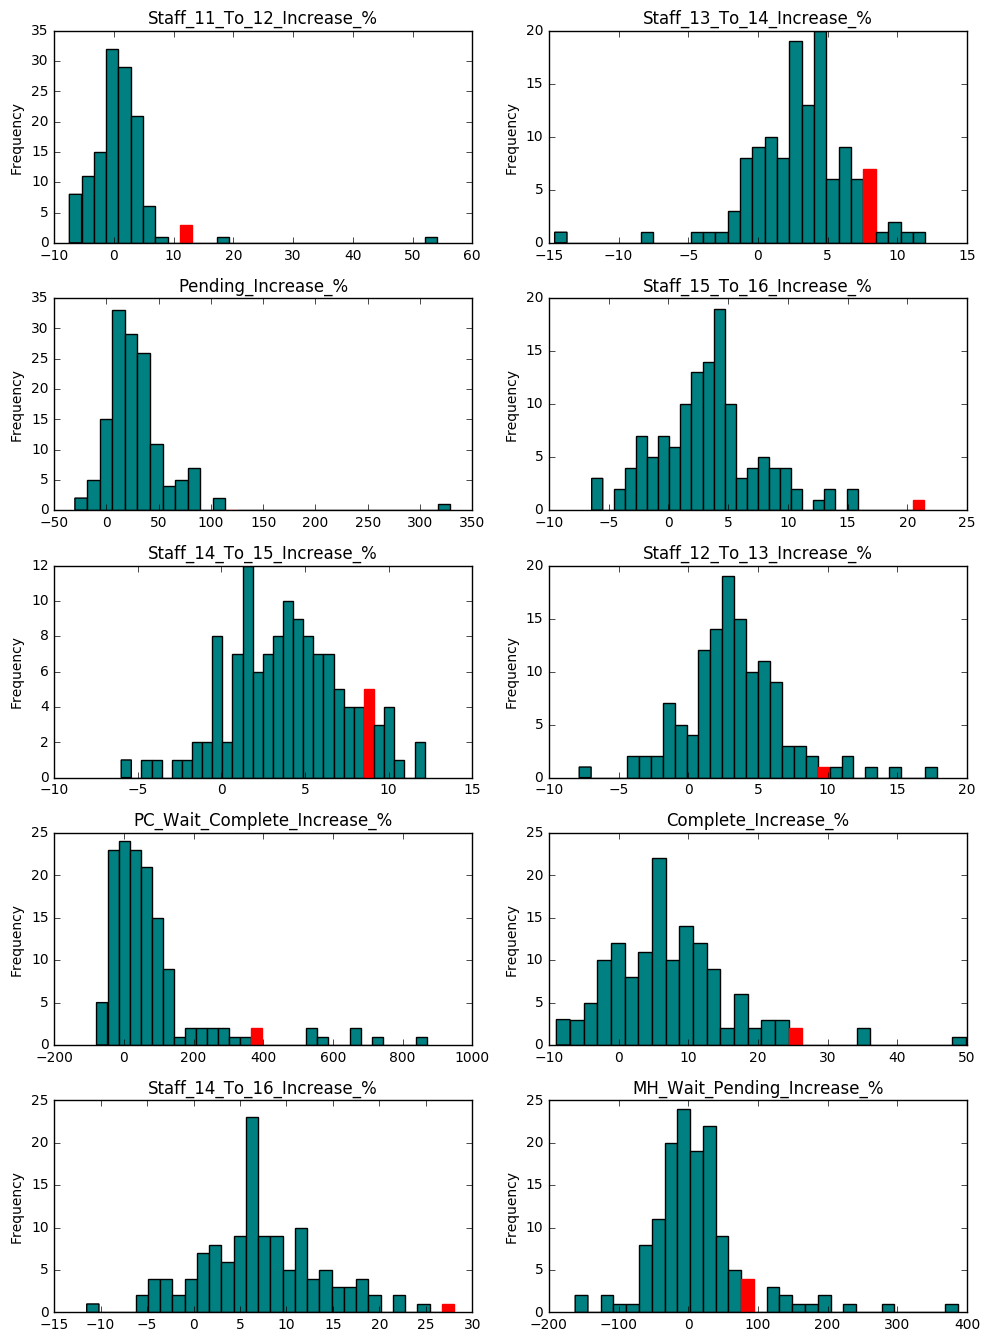

In [370]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=6, ncols=2,figsize=(10,16))
axes_list = [item for sublist in axes for item in sublist] 

interesting_angles.append("MH_Wait_Pending_Increase_%")
for factor in interesting_angles:
    ax = axes_list.pop(0)
    ax.set_title(factor)
    marked_hist(factor,ax)


# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()

plt.tight_layout()

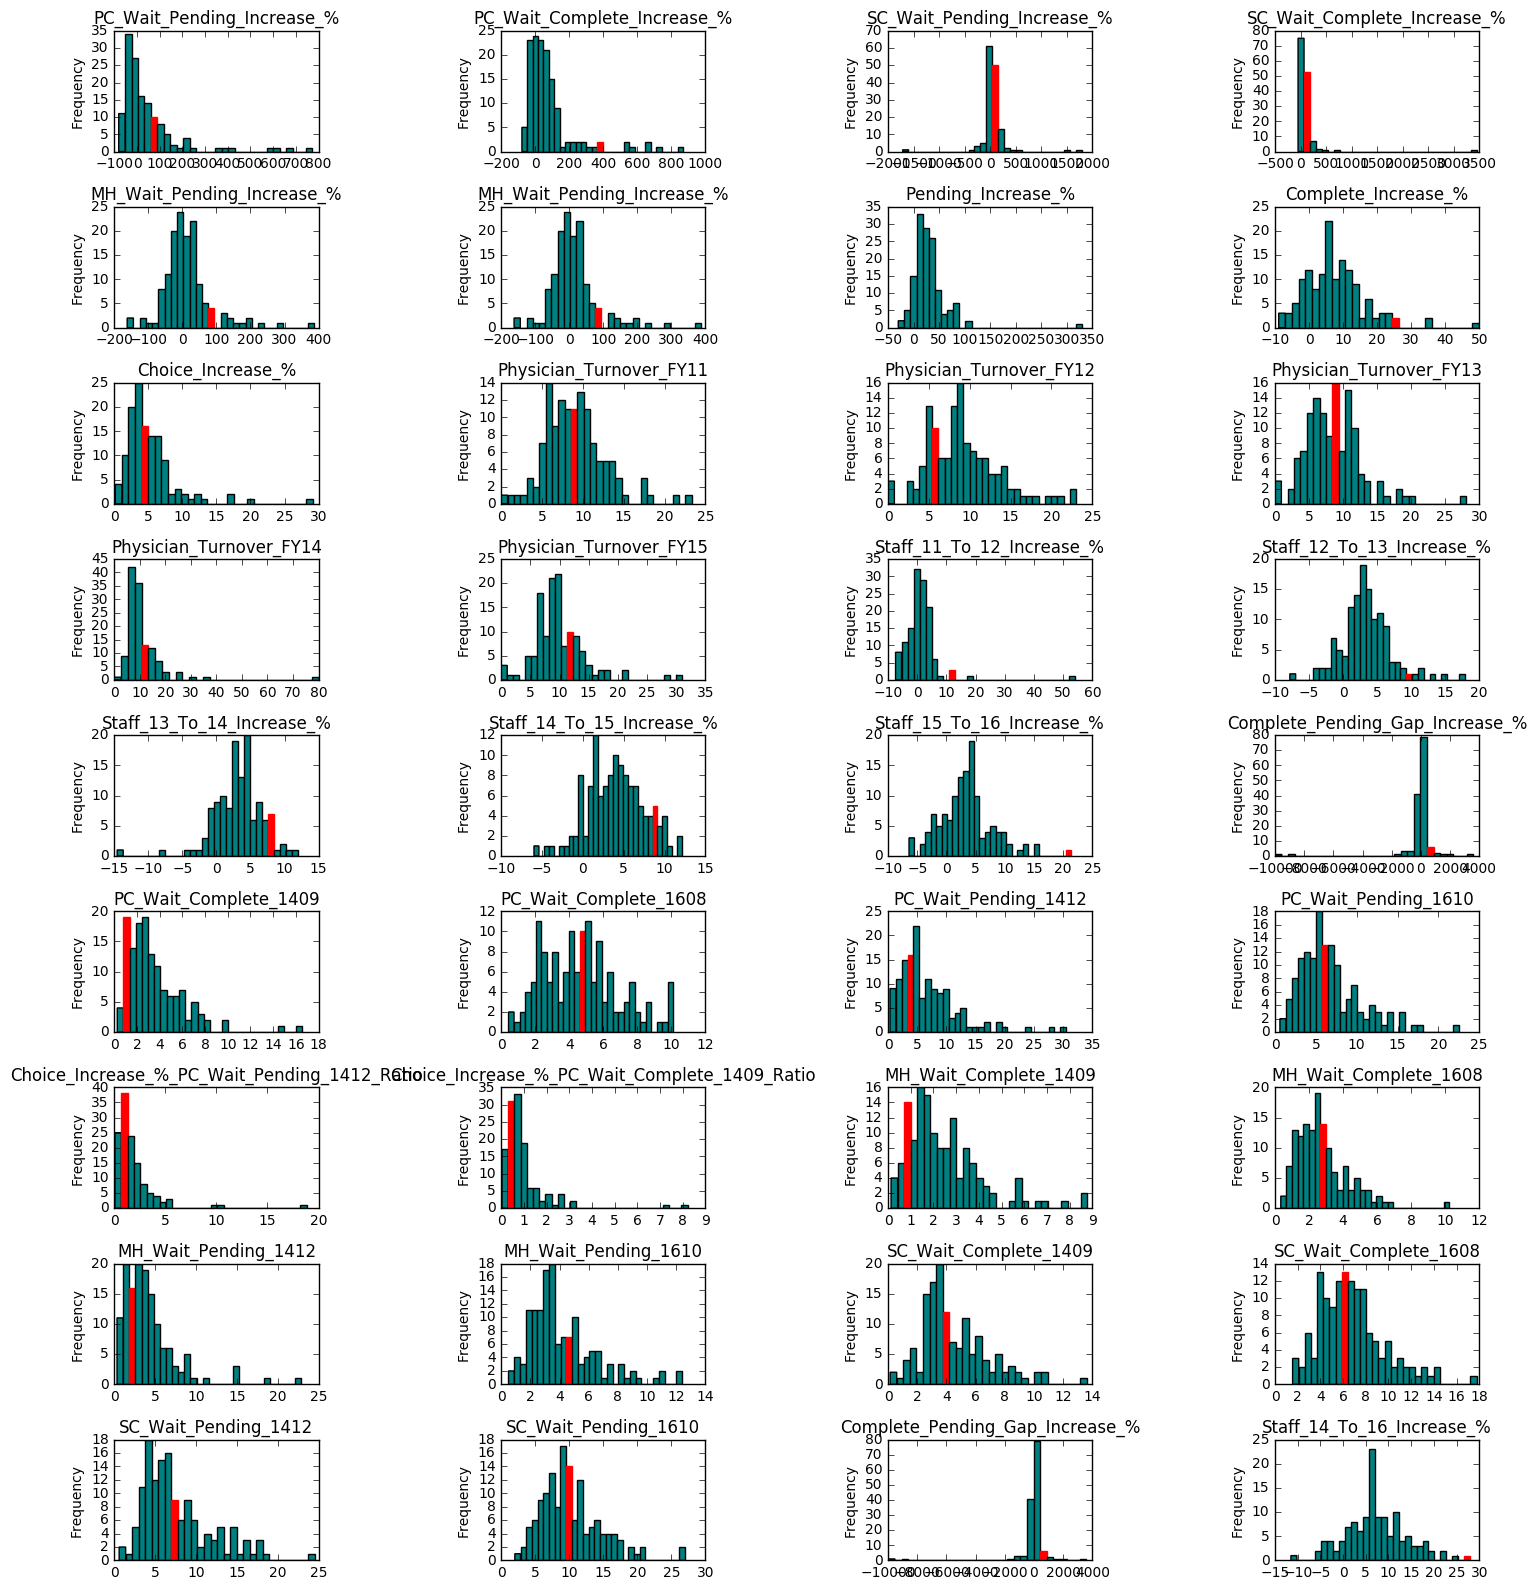

In [371]:
# We can ask for ALL THE AXES and put them into axes
fig, axes = plt.subplots(nrows=9, ncols=4,figsize=(15,16))
axes_list = [item for sublist in axes for item in sublist] 

for factor in factors:
    ax = axes_list.pop(0)
    ax.set_title(factor)
    marked_hist(factor,ax)


# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()

plt.tight_layout()

In [372]:

print "================\nWait Times\n"
print std_distance('PC_Wait_Pending_Increase_%')
print std_distance('PC_Wait_Complete_Increase_%')
print std_distance('SC_Wait_Pending_Increase_%')
print std_distance('SC_Wait_Complete_Increase_%')
print std_distance('MH_Wait_Pending_Increase_%')
print std_distance('MH_Wait_Complete_Increase_%')
print "================\nAppointments\n"
print std_distance("Pending_Increase_%")
print std_distance("Complete_Increase_%")
print std_distance("Complete_Pending_Gap_Increase_%")

print "================\nChoice Hires\n"
print std_distance("Choice_Increase_%")
print std_distance("Choice_Increase_%_PC_Wait_Complete_1409_Ratio")
print "================\nPhysician Turnover\n"
print std_distance("Physician_Turnover_FY11")
print std_distance("Physician_Turnover_FY12")
print std_distance("Physician_Turnover_FY13")
print std_distance("Physician_Turnover_FY14")
print std_distance("Physician_Turnover_FY15")
print "================\nStaff Increase\n"
print std_distance('Staff_11_To_12_Increase_%')
print std_distance('Staff_12_To_13_Increase_%')
print std_distance('Staff_13_To_14_Increase_%')
print std_distance('Staff_14_To_15_Increase_%')
print std_distance('Staff_15_To_16_Increase_%')

Wait Times

PC_Wait_Pending_Increase_%: 0.192075761235
PC_Wait_Complete_Increase_%: 1.726262095
SC_Wait_Pending_Increase_%: -0.00459221208737
SC_Wait_Complete_Increase_%: -0.0949942565631
MH_Wait_Pending_Increase_%: 0.826115640187
MH_Wait_Complete_Increase_%: 0.964028015327
Appointments

Pending_Increase_%: 2.19819598138
Complete_Increase_%: 1.90582379925
Complete_Pending_Gap_Increase_%: 0.315678228206
Choice Hires

Choice_Increase_%: -0.413344923835
Choice_Increase_%_PC_Wait_Complete_1409_Ratio: -0.642174007911
Physician Turnover

Physician_Turnover_FY11: -0.160971688014
Physician_Turnover_FY12: -0.900103264755
Physician_Turnover_FY13: -0.108853292399
Physician_Turnover_FY14: -0.135204074176
Physician_Turnover_FY15: 0.28237848511
Staff Increase

Staff_11_To_12_Increase_%: 1.62509955705
Staff_12_To_13_Increase_%: 1.60334755163
Staff_13_To_14_Increase_%: 1.26610461746
Staff_14_To_15_Increase_%: 1.26424807446
Staff_15_To_16_Increase_%: 3.98050770846


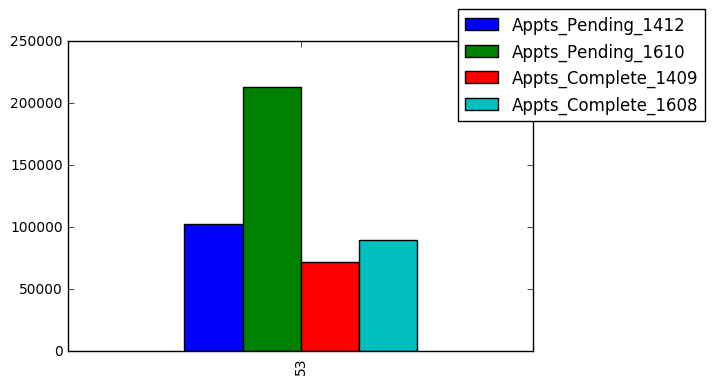

In [373]:
ax = Station[["Appts_Pending_1412","Appts_Pending_1610","Appts_Complete_1409","Appts_Complete_1608"]].plot(kind="bar",)
plt.legend(bbox_to_anchor=(1.2, 1),
           bbox_transform=plt.gcf().transFigure)

In [374]:
for column in df.columns:
    print column

Appts_Pending_1412
%_Appts_Over_30_Pending_1412
PC_Wait_Pending_1412
SC_Wait_Pending_1412
MH_Wait_Pending_1412
for_dups
ORGANIZATION
MAY-FY11
MAY-FY12
MAY-FY13
MAY-FY14
MAY-FY15
MAY-FY16
ID
Appts_Pending_1610
%_Appts_Over_30_Pending_1610
PC_Wait_Pending_1610
SC_Wait_Pending_1610
MH_Wait_Pending_1610
Appts_Complete_1608
%_Appts_Over_30_Complete_1608
PC_Wait_Complete_1608
SC_Wait_Complete_1608
MH_Wait_Complete_1608
Station
Location
Choice_Hires
Interim
Vacancy
%_Appts_Over_30_Complete_1409
Appts_Complete_1409
MH_Wait_Complete_1409
PC_Wait_Complete_1409
SC_Wait_Complete_1409
Physician_Turnover_FY11
Physician_Turnover_FY12
Physician_Turnover_FY13
Physician_Turnover_FY14
Physician_Turnover_FY15
NbrPsychiatrists
Pending_Increase
Pending_Increase_%
Complete_Increase
Complete_Increase_%
Complete_Pending_Appts_Diff_14
Complete_Pending_Appts_Diff_16
Complete_Pending_Appts_Diff_14_%
Complete_Pending_Appts_Diff_16_%
Complete_Pending_Gap_Increase_%
Missing_Leadership
Staff_11_To_12_Increase
Staff_1

In [375]:
for factor in factors:
    print factor

PC_Wait_Pending_Increase_%
PC_Wait_Complete_Increase_%
SC_Wait_Pending_Increase_%
SC_Wait_Complete_Increase_%
MH_Wait_Pending_Increase_%
MH_Wait_Pending_Increase_%
Pending_Increase_%
Complete_Increase_%
Choice_Increase_%
Physician_Turnover_FY11
Physician_Turnover_FY12
Physician_Turnover_FY13
Physician_Turnover_FY14
Physician_Turnover_FY15
Staff_11_To_12_Increase_%
Staff_12_To_13_Increase_%
Staff_13_To_14_Increase_%
Staff_14_To_15_Increase_%
Staff_15_To_16_Increase_%
Complete_Pending_Gap_Increase_%
PC_Wait_Complete_1409
PC_Wait_Complete_1608
PC_Wait_Pending_1412
PC_Wait_Pending_1610
Choice_Increase_%_PC_Wait_Pending_1412_Ratio
Choice_Increase_%_PC_Wait_Complete_1409_Ratio
MH_Wait_Complete_1409
MH_Wait_Complete_1608
MH_Wait_Pending_1412
MH_Wait_Pending_1610
SC_Wait_Complete_1409
SC_Wait_Complete_1608
SC_Wait_Pending_1412
SC_Wait_Pending_1610
Complete_Pending_Gap_Increase_%
Staff_14_To_16_Increase_%


# Finding an example Station

I'm making a mock up for our tool and I want just one station to look at for our example. I want a station with some large numbers. 

In [376]:
df.columns

Index([u'Appts_Pending_1412', u'%_Appts_Over_30_Pending_1412',
       u'PC_Wait_Pending_1412', u'SC_Wait_Pending_1412',
       u'MH_Wait_Pending_1412', u'for_dups', u'ORGANIZATION', u'MAY-FY11',
       u'MAY-FY12', u'MAY-FY13', u'MAY-FY14', u'MAY-FY15', u'MAY-FY16', u'ID',
       u'Appts_Pending_1610', u'%_Appts_Over_30_Pending_1610',
       u'PC_Wait_Pending_1610', u'SC_Wait_Pending_1610',
       u'MH_Wait_Pending_1610', u'Appts_Complete_1608',
       u'%_Appts_Over_30_Complete_1608', u'PC_Wait_Complete_1608',
       u'SC_Wait_Complete_1608', u'MH_Wait_Complete_1608', u'Station',
       u'Location', u'Choice_Hires', u'Interim', u'Vacancy',
       u'%_Appts_Over_30_Complete_1409', u'Appts_Complete_1409',
       u'MH_Wait_Complete_1409', u'PC_Wait_Complete_1409',
       u'SC_Wait_Complete_1409', u'Physician_Turnover_FY11',
       u'Physician_Turnover_FY12', u'Physician_Turnover_FY13',
       u'Physician_Turnover_FY14', u'Physician_Turnover_FY15',
       u'NbrPsychiatrists', u'Pending_In

In [377]:
example_station = df[(df["angles"]>4)& (df["MAY-FY16"] >2000)& (df["strong_angles"]>1)]
example_station["Name"]

53    ORLANDO, FL
Name: Name, dtype: object

In [378]:
example_station["qualitative_size"]

53    large
Name: qualitative_size, dtype: object

In [379]:
example_station["Station"]

53    675
Name: Station, dtype: int64

In [380]:
example_station["Staff_To_Appts_Complete_16"]

53    24.174488
Name: Staff_To_Appts_Complete_16, dtype: float64

In [381]:
columns = [
    #"%_Appts_Over_30_Complete_1409","%_Appts_Over_30_Complete_1608",
           #"Percentage_Point_Wait_Over_30_Increase_Complete",
           #"PC_Wait_Complete_1409","PC_Wait_Complete_1608","PC_Wait_Complete_Increase","PC_Wait_Complete_Increase_%",
           #"SC_Wait_Complete_1409","SC_Wait_Complete_1608","SC_Wait_Complete_Increase","SC_Wait_Complete_Increase_%",
           #"MH_Wait_Complete_1409","MH_Wait_Complete_1608","MH_Wait_Complete_Increase","MH_Wait_Complete_Increase_%",
    #"Choice_Hires","Choice_Increase_%",
    #'Staff_14_To_16_Increase','Staff_14_To_16_Increase_%',
    'Physician_Turnover_FY11','Physician_Turnover_FY12','Physician_Turnover_FY13','Physician_Turnover_FY14','Physician_Turnover_FY15',
            #'Appts_Complete_1409','Appts_Complete_1608','Complete_Increase','Complete_Increase_%',
            #'Appts_Pending_1412','Appts_Pending_1610','Pending_Increase','Pending_Increase_%',
           "SC_Wait_Complete_Increase_%","MH_Wait_Complete_Increase_%",'Complete_Pending_Gap_Increase_%']
example_station[columns]

,Physician_Turnover_FY11,Physician_Turnover_FY12,Physician_Turnover_FY13,Physician_Turnover_FY14,Physician_Turnover_FY15,SC_Wait_Complete_Increase_%,MH_Wait_Complete_Increase_%,Complete_Pending_Gap_Increase_%
53,8.42,5.2,8.07,9.71,11.14,69.688385,226.190476,306.637621


In [382]:
df_no_nan=df[(df["MAY-FY14"].notnull())&(df["Choice_Hires"].notnull())]
df_no_nan[columns].describe()

,Physician_Turnover_FY11,Physician_Turnover_FY12,Physician_Turnover_FY13,Physician_Turnover_FY14,Physician_Turnover_FY15,SC_Wait_Complete_Increase_%,MH_Wait_Complete_Increase_%,Complete_Pending_Gap_Increase_%
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,9.024488,9.168661,8.562992,10.899764,9.983622,103.369066,50.554791,-88.748419
std,3.756898,4.276118,4.096385,8.058899,4.346034,316.974696,123.343475,1289.401871
min,0.000000,0.000000,0.000000,3.490000,0.000000,-48.531012,-79.291553,-9983.333333
25%,6.470000,5.895000,6.010000,7.260000,7.225000,13.979667,-24.363499,-101.815108
50%,8.890000,8.570000,8.340000,8.890000,9.520000,66.230366,12.844037,22.008663
75%,10.915000,11.255000,10.800000,11.975000,11.725000,111.319145,78.892256,151.396763
max,23.300000,23.040000,28.040000,80.000000,30.950000,3464.285714,696.103896,3588.135593


In [383]:
df_no_nan_turnover=df[df["Physician_Turnover_FY12"].notnull()]
df_no_nan_turnover[columns].describe()

,Physician_Turnover_FY11,Physician_Turnover_FY12,Physician_Turnover_FY13,Physician_Turnover_FY14,Physician_Turnover_FY15,SC_Wait_Complete_Increase_%,MH_Wait_Complete_Increase_%,Complete_Pending_Gap_Increase_%
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,9.020543,9.088295,8.521008,10.799070,9.897054,102.496767,49.794993,-90.674242
std,3.730735,4.319832,4.143262,8.055007,4.401701,314.676648,122.592842,1279.482082
min,0.000000,0.000000,0.000000,0.000000,0.000000,-48.531012,-79.291553,-9983.333333
25%,6.550000,5.870000,6.010000,7.240000,7.210000,13.396226,-24.633431,-106.636771
50%,8.890000,8.570000,8.340000,8.810000,9.330000,66.230366,12.844037,20.612089
75%,10.870000,11.170000,10.810000,11.930000,11.680000,111.718750,78.451178,149.492754
max,23.300000,23.040000,28.040000,80.000000,30.950000,3464.285714,696.103896,3588.135593


In [384]:
df[columns].describe()

,Physician_Turnover_FY11,Physician_Turnover_FY12,Physician_Turnover_FY13,Physician_Turnover_FY14,Physician_Turnover_FY15,SC_Wait_Complete_Increase_%,MH_Wait_Complete_Increase_%,Complete_Pending_Gap_Increase_%
count,129.000000,129.000000,129.000000,129.000000,129.000000,140.000000,140.000000,140.000000
mean,9.020543,9.088295,8.521008,10.799070,9.897054,98.441302,59.674316,-81.656496
std,3.730735,4.319832,4.143262,8.055007,4.401701,302.680581,172.729586,1230.031350
min,0.000000,0.000000,0.000000,0.000000,0.000000,-48.531012,-79.291553,-9983.333333
25%,NaN,NaN,NaN,NaN,NaN,13.104121,-23.987464,-107.713786
50%,NaN,NaN,NaN,NaN,NaN,62.428654,23.908891,15.793028
75%,NaN,NaN,NaN,NaN,NaN,111.119343,77.356157,141.979450
max,23.300000,23.040000,28.040000,80.000000,30.950000,3464.285714,1538.461538,3588.135593


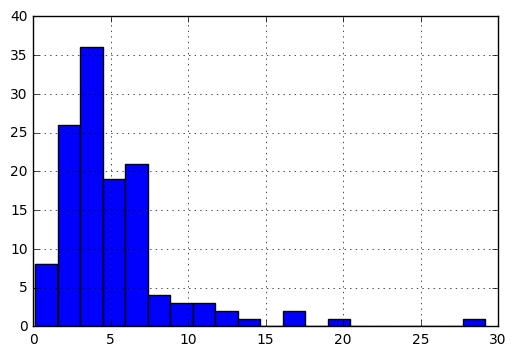

In [385]:
df["Choice_Increase_%"].hist(bins=20)

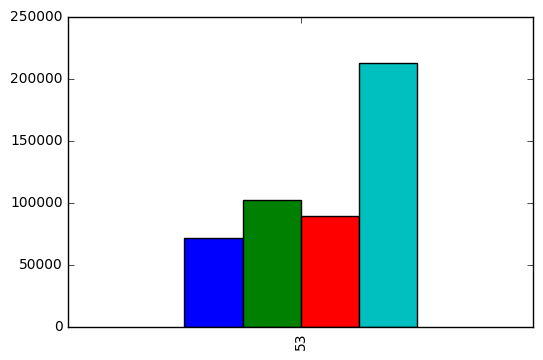

In [386]:
ax = example_station[['Appts_Complete_1409','Appts_Pending_1412','Appts_Complete_1608','Appts_Pending_1610']].plot(kind='bar')
ax.legend_.remove()

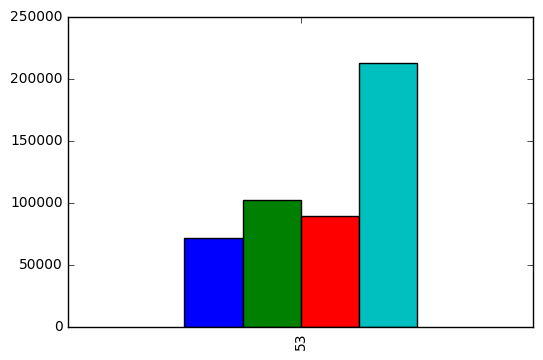

In [387]:
ax = Station[['Appts_Complete_1409','Appts_Pending_1412','Appts_Complete_1608','Appts_Pending_1610']].plot(kind='bar')
ax.legend_.remove()

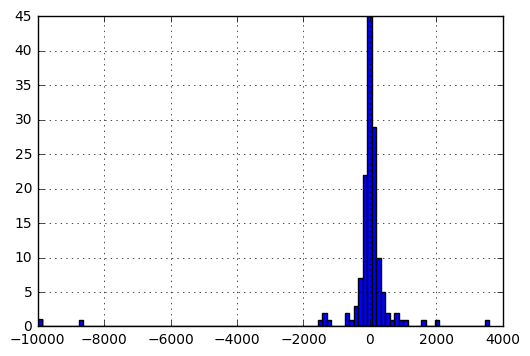

In [388]:
df["Complete_Pending_Gap_Increase_%"].hist(bins=100)